# Fashion MNIST

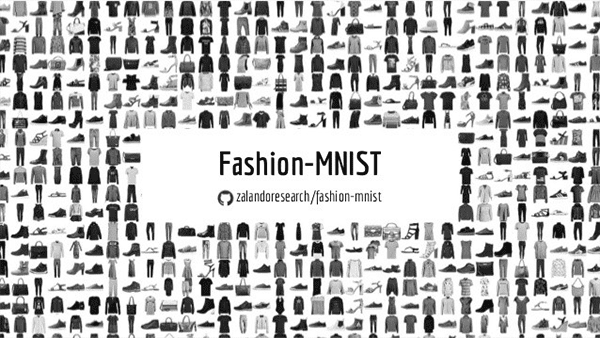

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try.  "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset


# Data Description

In [99]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [72]:
train_data=pd.read_csv("C:/Users/gokul/OneDrive/Desktop/machine_learning/projects/fashion-mnist_train.csv")

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
test_data=pd.read_csv("C:/Users/gokul/OneDrive/Desktop/machine_learning/projects/fashion-mnist_test.csv")

In [5]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_train=train_data.drop('label',axis=1)
y_train=train_data['label']

In [40]:
x_train.shape ,y_train.shape

((60000, 784), (60000,))

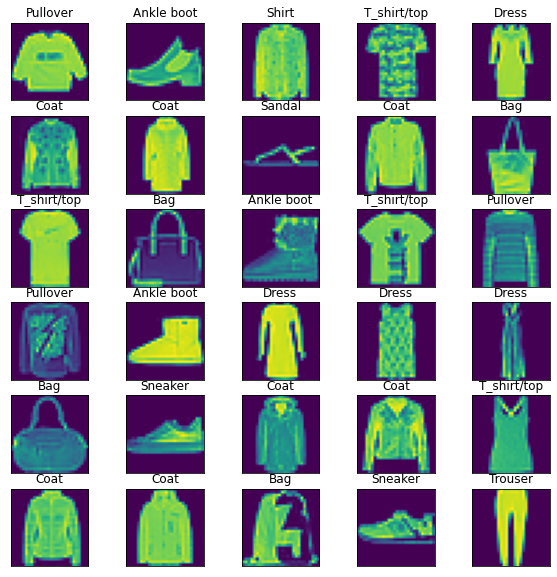

In [39]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(0,30):
  
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid=False
    array=x_train.loc[[i]].to_numpy()
    sample_img=array.reshape((28,28))
    plt.imshow(sample_img)
    plt.title(class_names[y_train[i]])

In [63]:
count=y_train.value_counts()
count

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

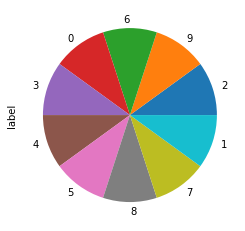

In [64]:
count.plot(kind='pie')

In [52]:
x_test=test_data.drop('label',axis=1)
y_test=test_data['label']

In [53]:
x_test.shape,y_test.shape

((10000, 784), (10000,))

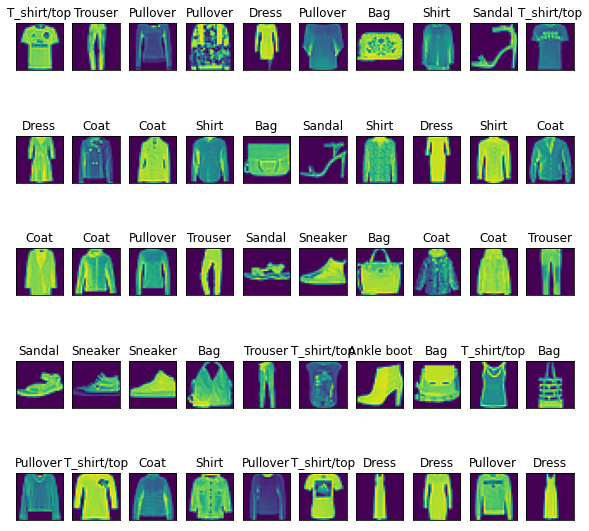

In [57]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))

for i in range(50):
  
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid=False
    
    
    array=x_test.loc[[i]].to_numpy()
   
    sample_img=array.reshape((28,28))
    
    plt.imshow(sample_img)
    
    plt.title(class_names[y_test[i]])

In [65]:
count=y_test.value_counts()
count

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

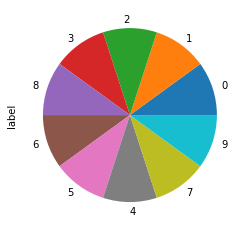

In [61]:
count.plot(kind='pie')

In [86]:
lr_model=LogisticRegression()

In [87]:
lr_model.fit(x_train,y_train)

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
y_pred_lr=model.predict(x_test)

In [89]:
y_pred_lr

array([0, 1, 2, ..., 8, 8, 2], dtype=int64)

In [90]:
accuracy_score(y_pred_lr,y_test)

0.8565

<AxesSubplot:>

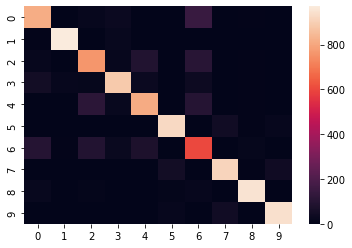

In [104]:
sns.heatmap(confusion_matrix(y_pred_lr,y_test))

In [100]:
sgdc_model=SGDClassifier(random_state=10)

In [101]:
sgdc_model.fit(x_train,y_train)

SGDClassifier(random_state=10)

In [102]:
y_pred_sgdc=sgdc_model.predict(x_test)

In [103]:
y_pred_sgdc

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [106]:
accuracy_score(y_pred_sgdc,y_test)

0.8413

<AxesSubplot:>

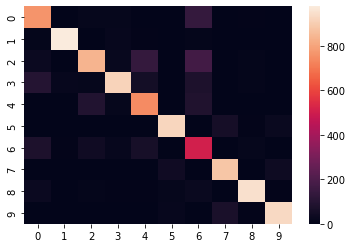

In [105]:
sns.heatmap(confusion_matrix(y_pred_sgdc,y_test))

In [114]:
rfc_model=RandomForestClassifier(n_estimators=200,criterion='entropy')

In [115]:
rfc_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [116]:
y_pred_rfc=rfc_model.predict(x_test)

In [117]:
y_pred_rfc

array([0, 1, 2, ..., 8, 8, 2], dtype=int64)

In [118]:
accuracy_score(y_pred_rfc,y_test)

0.8849

<AxesSubplot:>

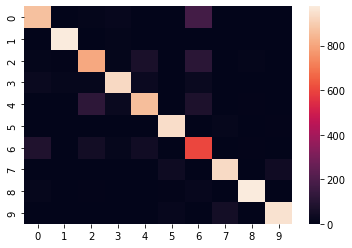

In [113]:
sns.heatmap(confusion_matrix(y_pred_rfc,y_test))

In [119]:
dtc_model=DecisionTreeClassifier()

In [120]:
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
y_pred_dtc=dtc_model.predict(x_test)

In [123]:
accuracy_score(y_pred_dtc,y_test)

0.8013

<AxesSubplot:>

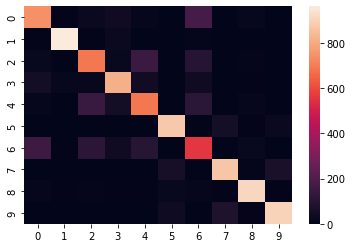

In [124]:
sns.heatmap(confusion_matrix(y_pred_dtc,y_test))